In [1]:
!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
df_aapl = pdr.get_data_yahoo('AAPL')

In [6]:
df_aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-02,158.229996,153.270004,156.710007,157.960007,123055300.0,157.728256
2022-05-03,160.710007,156.320007,158.149994,159.479996,88966500.0,159.246017
2022-05-04,166.479996,159.259995,159.669998,166.020004,108256500.0,165.776428
2022-05-05,164.080002,154.949997,163.850006,156.770004,130525300.0,156.540009
2022-05-06,159.440002,154.179993,156.009995,157.279999,116055700.0,157.279999


<AxesSubplot:xlabel='Date'>

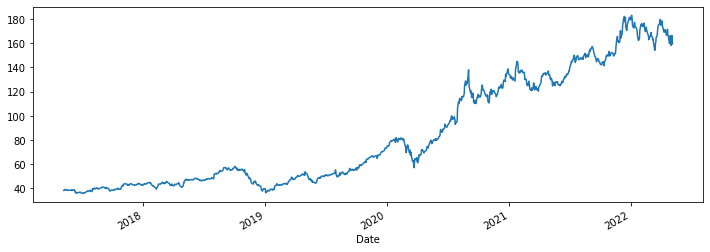

In [8]:
df_aapl['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

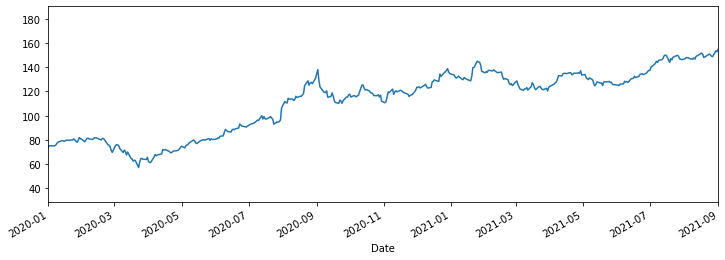

In [9]:
df_aapl['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

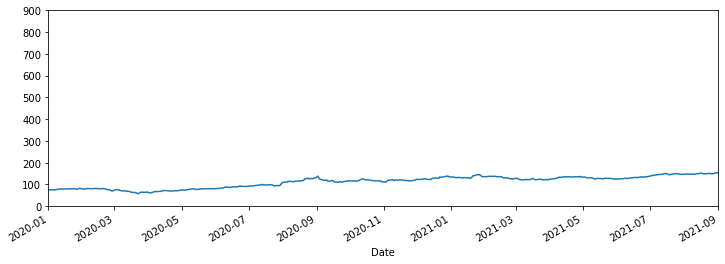

In [12]:
df_aapl['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

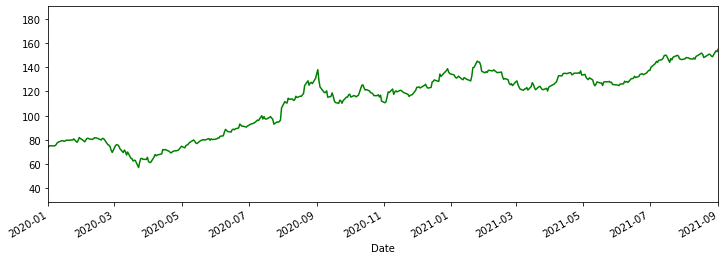

In [13]:
df_aapl['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4),c='green')

<AxesSubplot:xlabel='Date'>

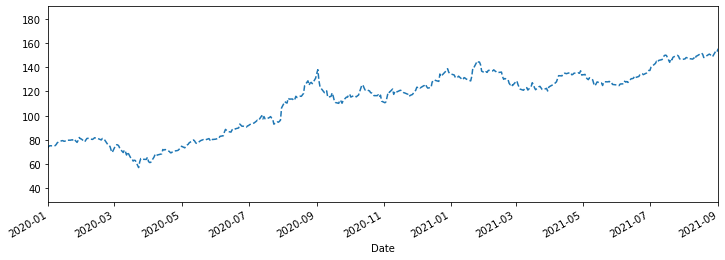

In [14]:
df_aapl['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4),ls='--')

In [15]:
df_aapl.index

DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [22]:
index=df_aapl.loc['2020-01-01':'2021-09-01'].index

In [23]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [18]:
share_open = df_aapl.loc['2020-01-01':'2021-09-01']['Open']

In [19]:
share_open

Date
2020-01-02     74.059998
2020-01-03     74.287498
2020-01-06     73.447502
2020-01-07     74.959999
2020-01-08     74.290001
                 ...    
2021-08-26    148.350006
2021-08-27    147.479996
2021-08-30    149.000000
2021-08-31    152.660004
2021-09-01    152.830002
Name: Open, Length: 421, dtype: float64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

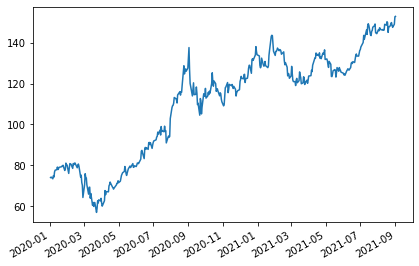

In [26]:
figure, axes = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axes.plot(index,share_open)

In [27]:
df_aapl = df_aapl.reset_index()

In [28]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [32]:
df_aapl = df_aapl.set_index('Date',drop=True)

In [33]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-08,38.424999,37.257500,37.257500,38.252499,195009600.0,36.063492
2017-05-09,38.720001,38.362499,38.467499,38.497501,156521600.0,36.294468
2017-05-10,38.485001,38.027500,38.407501,38.314999,103222800.0,36.122414
2017-05-11,38.517502,38.077499,38.112499,38.487499,109020400.0,36.434814
2017-05-12,39.105000,38.667500,38.674999,39.025002,130108000.0,36.943649


In [34]:
datetime.now()

datetime.datetime(2022, 5, 8, 9, 59, 58, 2604)

In [35]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [37]:
date=datetime(2021,11,21)

In [38]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [39]:
date.date()

datetime.date(2021, 11, 21)

In [40]:
date.day

21

In [45]:
date.weekday()

6

In [43]:
date.year

2021

### Time Resampling

In [46]:
## rule A gives year end frequency
df_aapl.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,35.875000,35.549999,35.724998,35.567501,56106800.0,33.670555
2018-12-31,37.887501,36.647499,37.037498,36.707500,50055600.0,35.537254
2019-12-31,36.430000,35.500000,35.994999,35.547501,45448000.0,34.414242
2020-12-31,57.125000,53.152500,57.020000,56.092499,46691300.0,55.250992
2021-12-31,120.400002,116.209999,119.029999,116.360001,41000000.0,115.502800
2022-12-31,154.119995,150.100006,150.899994,150.619995,61177400.0,150.399017


In [47]:
df_aapl.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,44.299999,43.715000,43.777500,44.105000,289229200.0,42.067348
2018-12-31,58.367500,57.445000,57.695000,58.017502,384986800.0,55.972591
2019-12-31,73.492500,72.379997,72.779999,73.412498,365248800.0,72.139938
2020-12-31,138.789993,134.339996,138.050003,136.690002,426510000.0,135.480560
2021-12-31,182.130005,178.529999,181.119995,180.330002,195432700.0,179.836319
2022-12-31,182.940002,179.119995,182.630005,182.009995,179935700.0,181.511703


<AxesSubplot:xlabel='Date'>

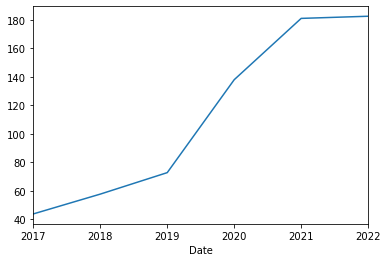

In [48]:
df_aapl.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

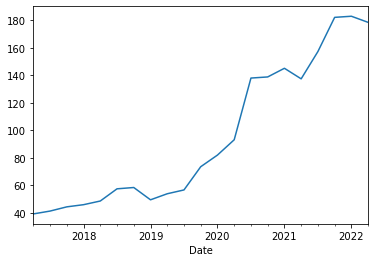

In [49]:
## quarterly
df_aapl.resample(rule='QS').max()['High'].plot()

In [50]:
##business end frequency
df_aapl.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,44.299999,43.715000,43.777500,44.105000,289229200.0,42.067348
2018-12-31,58.367500,57.445000,57.695000,58.017502,384986800.0,55.972591
2019-12-31,73.492500,72.379997,72.779999,73.412498,365248800.0,72.139938
2020-12-31,138.789993,134.339996,138.050003,136.690002,426510000.0,135.480560
2021-12-31,182.130005,178.529999,181.119995,180.330002,195432700.0,179.836319
2022-12-30,182.940002,179.119995,182.630005,182.009995,179935700.0,181.511703


In [51]:
##business quarters frequency
df_aapl.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,39.162498,38.762501,39.002499,39.025002,289229200.0,36.943649
2017-07-03,41.235001,40.907501,41.200001,41.012501,286856000.0,38.977615
2017-10-02,44.299999,43.715000,43.777500,44.105000,237594400.0,42.067348
2018-01-01,45.875000,45.052502,45.647499,45.430000,346375200.0,43.507805
2018-04-02,48.549999,48.090000,48.535000,48.494999,266157600.0,46.622208
2018-07-02,57.417500,56.657501,57.247501,57.090000,384986800.0,55.077778
2018-10-01,58.367500,57.445000,57.695000,58.017502,382978400.0,55.972591
2019-01-01,49.422501,47.695000,48.834999,48.772499,365248800.0,47.420124
2019-04-01,53.827499,52.557499,52.722500,52.937500,259309200.0,51.469643


<AxesSubplot:xlabel='Date'>

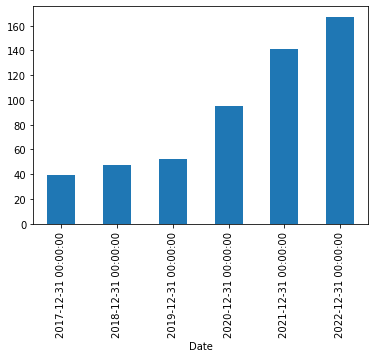

In [53]:
## we can also take single columns 

##plotting a barplot
df_aapl['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

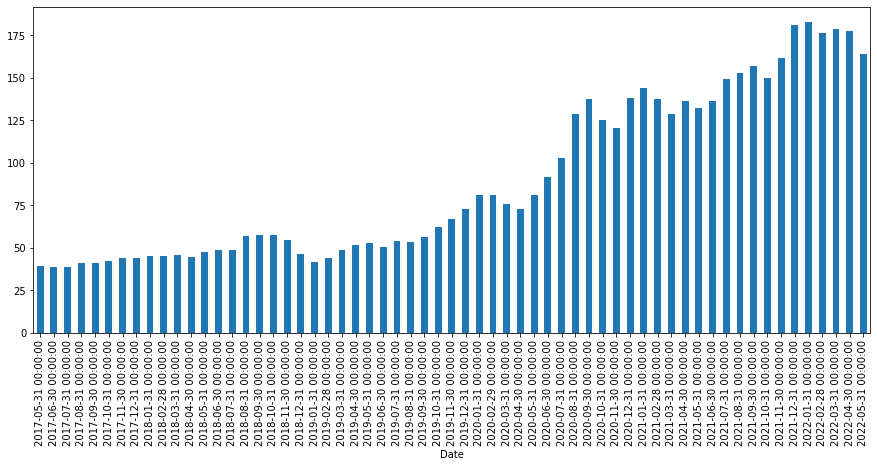

In [58]:
df_aapl['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))